<a href="https://colab.research.google.com/github/meenakshikagda/Data-visualization/blob/master/fig_1_testing_colors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
library("jsonlite") #https://cran.r-project.org/web/packages/jsonlite/jsonlite.pdf
library("dplyr")
library("httr") #https://cran.r-project.org/web/packages/httr/vignettes/quickstart.html
library("ggplot2")
library("RColorBrewer")

In [13]:
install.packages("splitstackshape")
library(splitstackshape)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("cowplot")
library("cowplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [1]:
base_url <- "https://www.encodeproject.org/search/?status=released&format=json&limit=all"
datatype <- "Dataset"
field1 <- "@type"

url <- paste(base_url, "&type=", datatype, "&field=", field1, sep="")

url

[1] "https://www.encodeproject.org/search/?status=released&format=json&limit=all&type=Dataset&field=@type"

In [5]:
req <- GET(url)

In [6]:
json <- content(req, as = "text")

No encoding supplied: defaulting to UTF-8.



In [7]:
text <-fromJSON(json)

In [8]:
colnames(text$`@graph`)

[1] "@id"   "@type"

In [9]:
text$`@graph`$`@id`[1] #exploring data for first entry

[1] "/annotations/ENCSR819HBB/"

In [10]:
my_df <- as.data.frame(text$`@graph`)

In [14]:
colnames(my_df)
my_df2 <- cSplit(my_df, "@id", "/")

[1] "@id"   "@type"

Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”


In [15]:
head(my_df2)

@type,@id_1,@id_2,@id_3
<list>,<lgl>,<chr>,<chr>
"Annotation, FileSet , Dataset , Item",NA,annotations,ENCSR819HBB
"Project, FileSet, Dataset, Item",NA,projects,ENCSR493EDY
"Reference, FileSet , Dataset , Item",NA,references,ENCSR608ULQ
"ReplicationTimingSeries, Series , Dataset , Item",NA,replication-timing-series,ENCSR591OXO
"TreatmentTimeSeries, Series , Dataset , Item",NA,treatment-time-series,ENCSR230KWM
"Annotation, FileSet , Dataset , Item",NA,annotations,ENCSR654DVI


In [16]:
colnames(my_df2)

[1] "@type" "@id_1" "@id_2" "@id_3"

In [17]:
colnames(my_df2)[3] <- "dataset_type"

In [19]:
colnames(my_df2)

[1] "@type"        "@id_1"        "dataset_type" "@id_3"

In [28]:
my_df3 <- my_df2 %>% group_by(dataset_type) %>% summarise(Count = n())

In [29]:
my_df3

dataset_type,Count
<chr>,<int>
aggregate-series,1
annotations,439020
disease-series,11
experiments,21913
functional-characterization-experiments,461
functional-characterization-series,65
gene-silencing-series,899
matched-sets,5
multiomics-series,3


In [30]:
my_df3 <- as.data.frame(my_df3)

In [31]:
p1 <- ggplot(my_df3, aes(x=reorder(dataset_type,Count), y=log(Count))) +
  geom_bar(stat="identity", color="plum", fill="plum") + 
    geom_text(aes(label = Count), vjust=0.5, hjust=1, angle=360) + 
    coord_flip() + theme_classic() +
    ggtitle("Number of ENCODE datasets by type") +
    theme(legend.position="none", 
           axis.title.x=element_text(vjust = -0.5, size=12, color="black", face="bold"),
           axis.title.y=element_text(hjust = 0.5, size=12, color="black", face="bold"),
           axis.text.x =element_text(size=12, color="black"),
           axis.text.y =element_text(size=12, color="black")) + 
           theme(plot.title = element_text(size = 12, face = "bold")) +
           xlab("dataset type") +
           ylab("log scale")

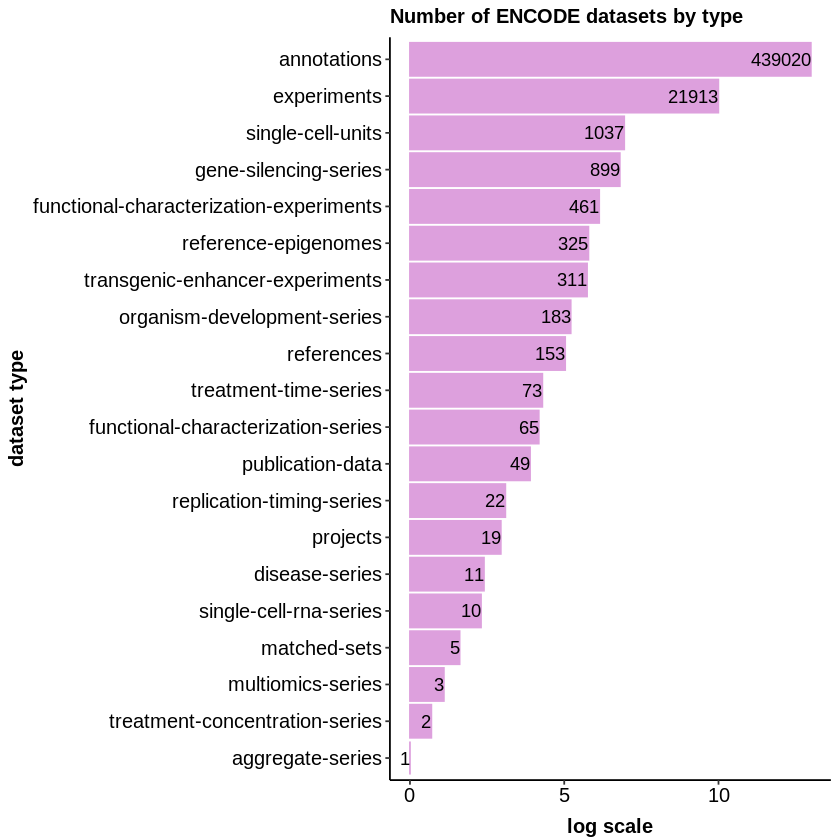

In [32]:
p1

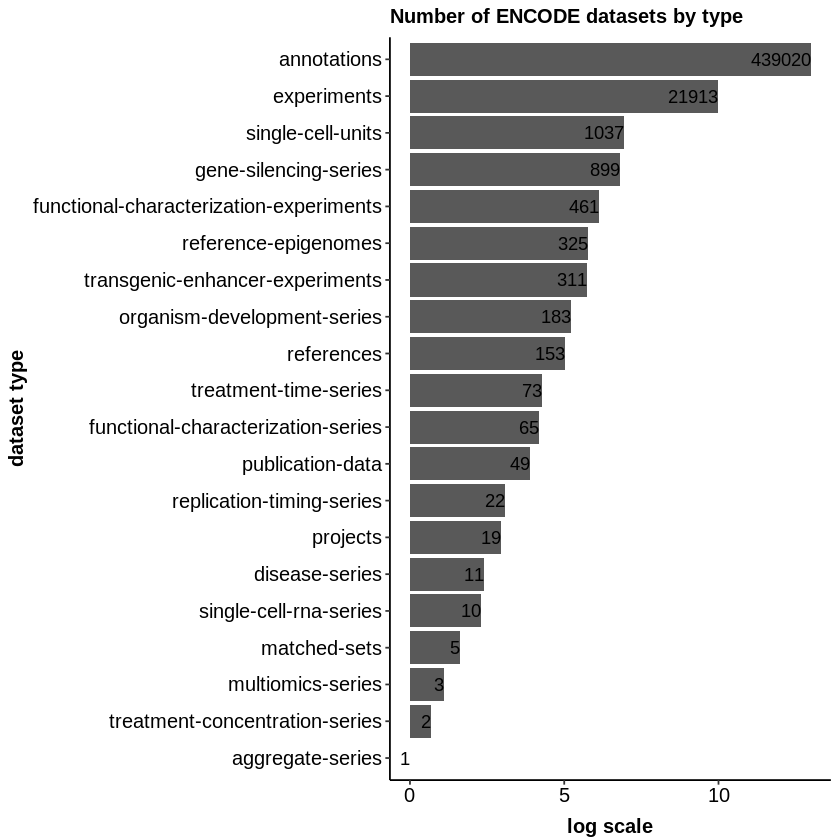

In [27]:
ggplot(my_df3, aes(x=reorder(dataset_type,n), y=log(n))) +
  geom_bar(stat="identity") + 
    geom_text(aes(label = n), vjust=0.5, hjust=1, angle=360) + 
    coord_flip() + theme_classic() +
    ggtitle("Number of ENCODE datasets by type") +
    theme(legend.position="none", 
           axis.title.x=element_text(vjust = -0.5, size=12, color="black", face="bold"),
           axis.title.y=element_text(hjust = 0.5, size=12, color="black", face="bold"),
           axis.text.x =element_text(size=12, color="black"),
           axis.text.y =element_text(size=12, color="black")) + 
           theme(plot.title = element_text(size = 12, face = "bold")) +
           xlab("dataset type") +
           ylab("log scale") + 
           scale_fill_gradientn(colors=(brewer.pal(9,"Blues")))

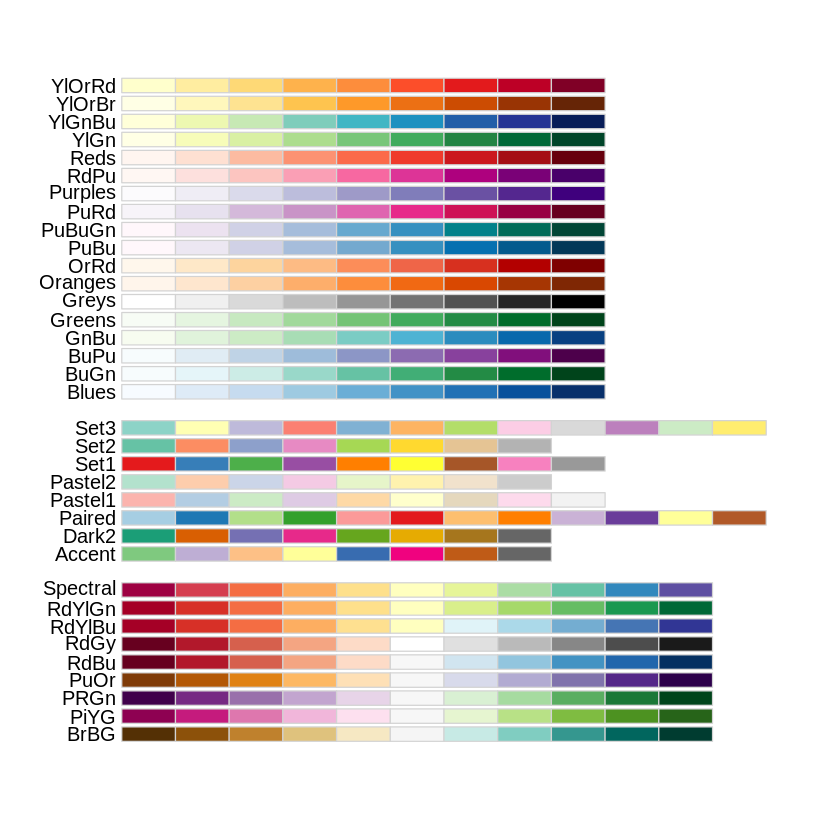

In [50]:
par(mar=c(3,4,2,2))
display.brewer.all()

In [65]:
mypalette <- brewer.pal(9,"YlGnBu")
morecols <- colorRampPalette(mypalette)

In [83]:
p2 <- ggplot(my_df3) +
    geom_col(aes(x=reorder(dataset_type,Count), y=log(Count), fill=log(Count)), 
    width=0.5, position = position_dodge(50)) +
    coord_flip() + theme_classic() +
    scale_fill_gradientn(colors=morecols(50)) +
    ggtitle("Number of ENCODE datasets by type") +
    theme(legend.position="none", 
           axis.title.x=element_text(vjust = -0.5, size=12, color="black", face="bold"),
           axis.title.y=element_text(hjust = 0.5, size=12, color="black", face="bold"),
           axis.text.x =element_text(size=12, color="black"),
           axis.text.y =element_text(size=12, color="black")) + 
           theme(plot.title = element_text(size = 12, face = "bold")) +
           xlab("dataset type") +
           ylab("log scale") 

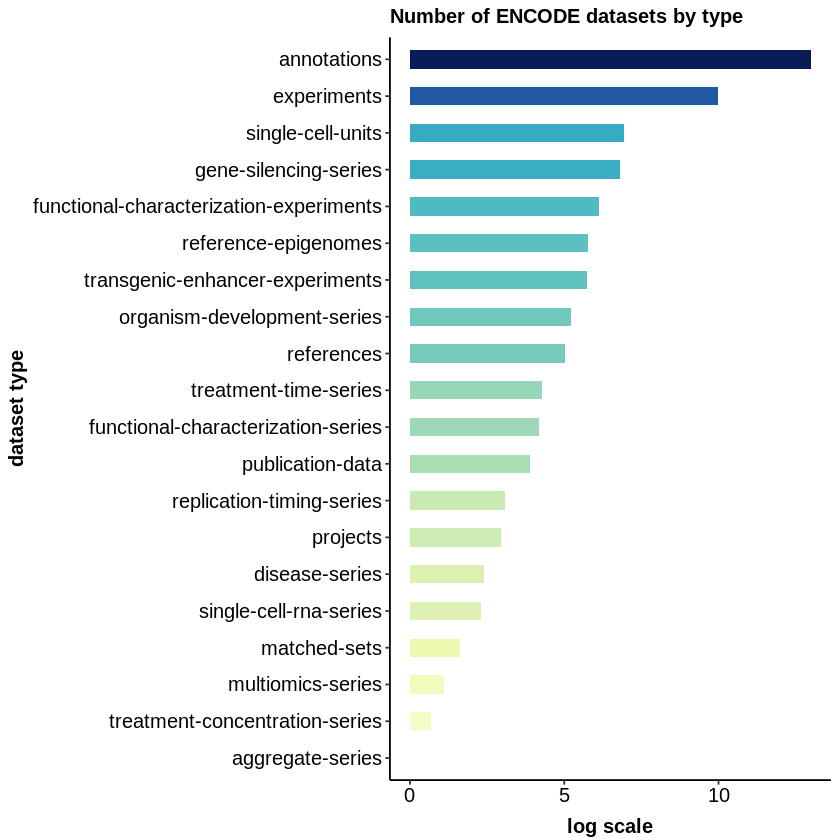

In [84]:
p2

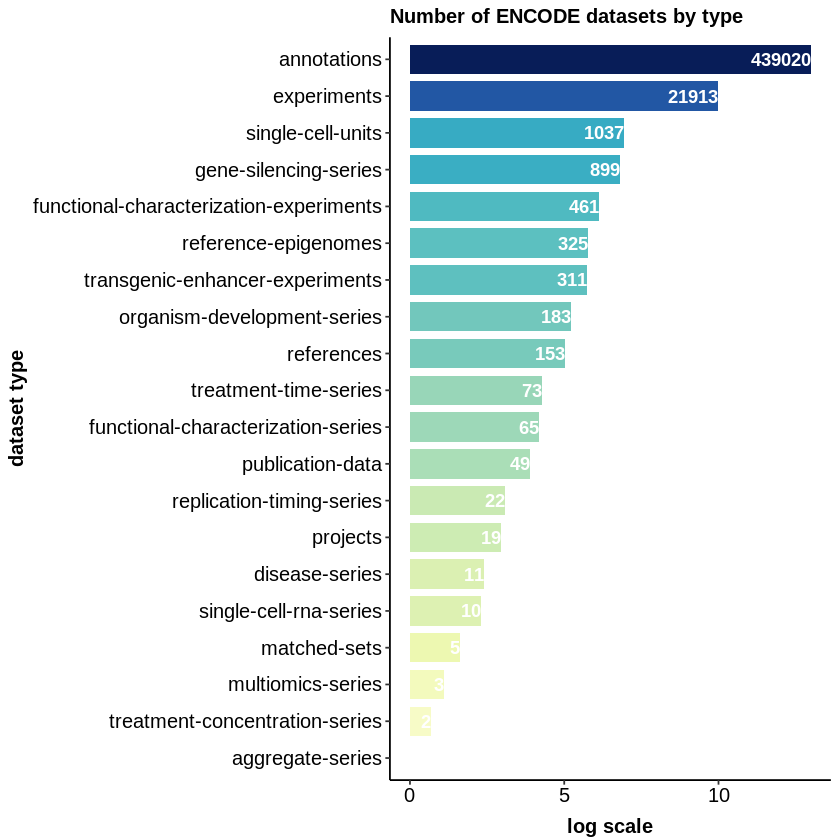

In [123]:
ggplot(my_df3) +
    geom_col(aes(x=reorder(dataset_type,Count), y=log(Count), fill=log(Count)), 
    width=0.8, position = position_dodge(50)) +
    coord_flip() + theme_classic() +
    scale_fill_gradientn(colors=morecols(50)) +
    geom_text(aes(x=reorder(dataset_type,Count), y=log(Count),label = Count), 
    vjust=0.5, hjust=1, angle=360, color="white", fontface='bold') +
    ggtitle("Number of ENCODE datasets by type") +
    theme(legend.position="none", 
            #plot.margin=unit(c(0.5,0.5,0.5,0.5),"cm"),
           axis.title.x=element_text(vjust = -0.5, size=12, color="black", face="bold"),
           axis.title.y=element_text(hjust = 0.5, size=12, color="black", face="bold"),
           axis.text.x =element_text(size=12, color="black"),
           axis.text.y =element_text(size=12, color="black")) + 
           theme(plot.title = element_text(size = 12, face = "bold"),
           panel.spacing = unit(1, 'cm')) +
           xlab("dataset type") +
           ylab("log scale") 

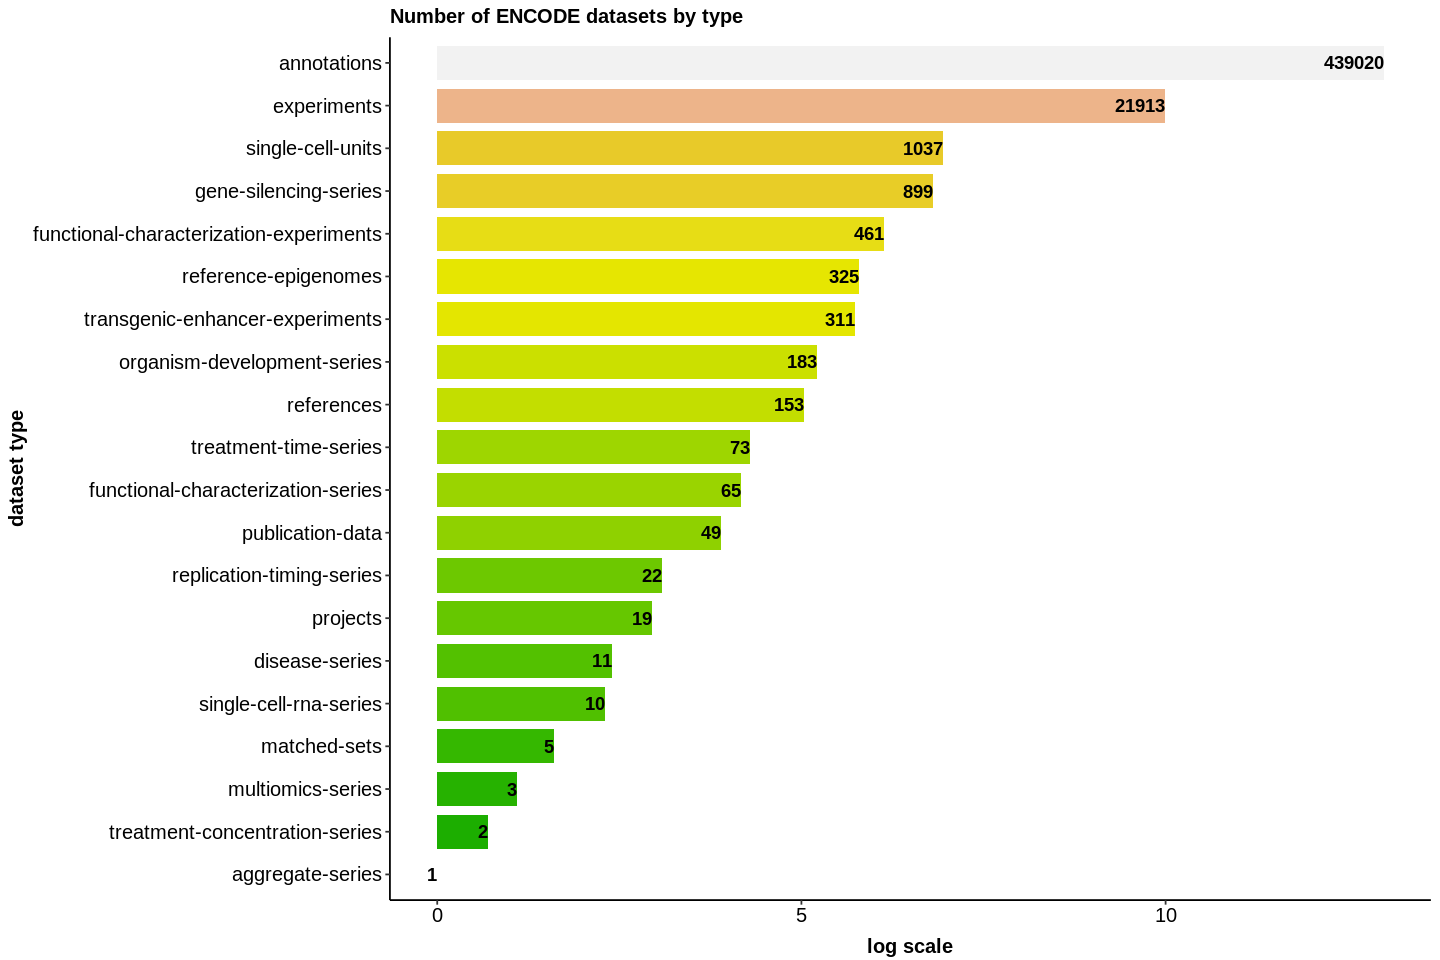

In [162]:
ggplot(my_df3) +
    geom_col(aes(x=reorder(dataset_type,Count), y=log(Count), fill=log(Count)),
    width=0.8, position = position_dodge(50)) +
    coord_flip() + theme_classic() +
    scale_fill_gradientn(colors=terrain.colors(10)) +
    geom_text(aes(x=reorder(dataset_type,Count), y=log(Count),label = Count), 
    vjust=0.5, hjust=1, angle=360, color="black", fontface='bold') +
    ggtitle("Number of ENCODE datasets by type") +
    theme(legend.position="none", 
            #plot.margin=unit(c(0.5,0.5,0.5,0.5),"cm"),
           axis.title.x=element_text(vjust = -0.5, size=12, color="black", face="bold"),
           axis.title.y=element_text(hjust = 0.5, size=12, color="black", face="bold"),
           axis.text.x =element_text(size=12, color="black"),
           axis.text.y =element_text(size=12, color="black")) + 
           theme(plot.title = element_text(size = 12, face = "bold"),
           panel.spacing = unit(1, 'cm')) +
           xlab("dataset type") +
           ylab("log scale") 

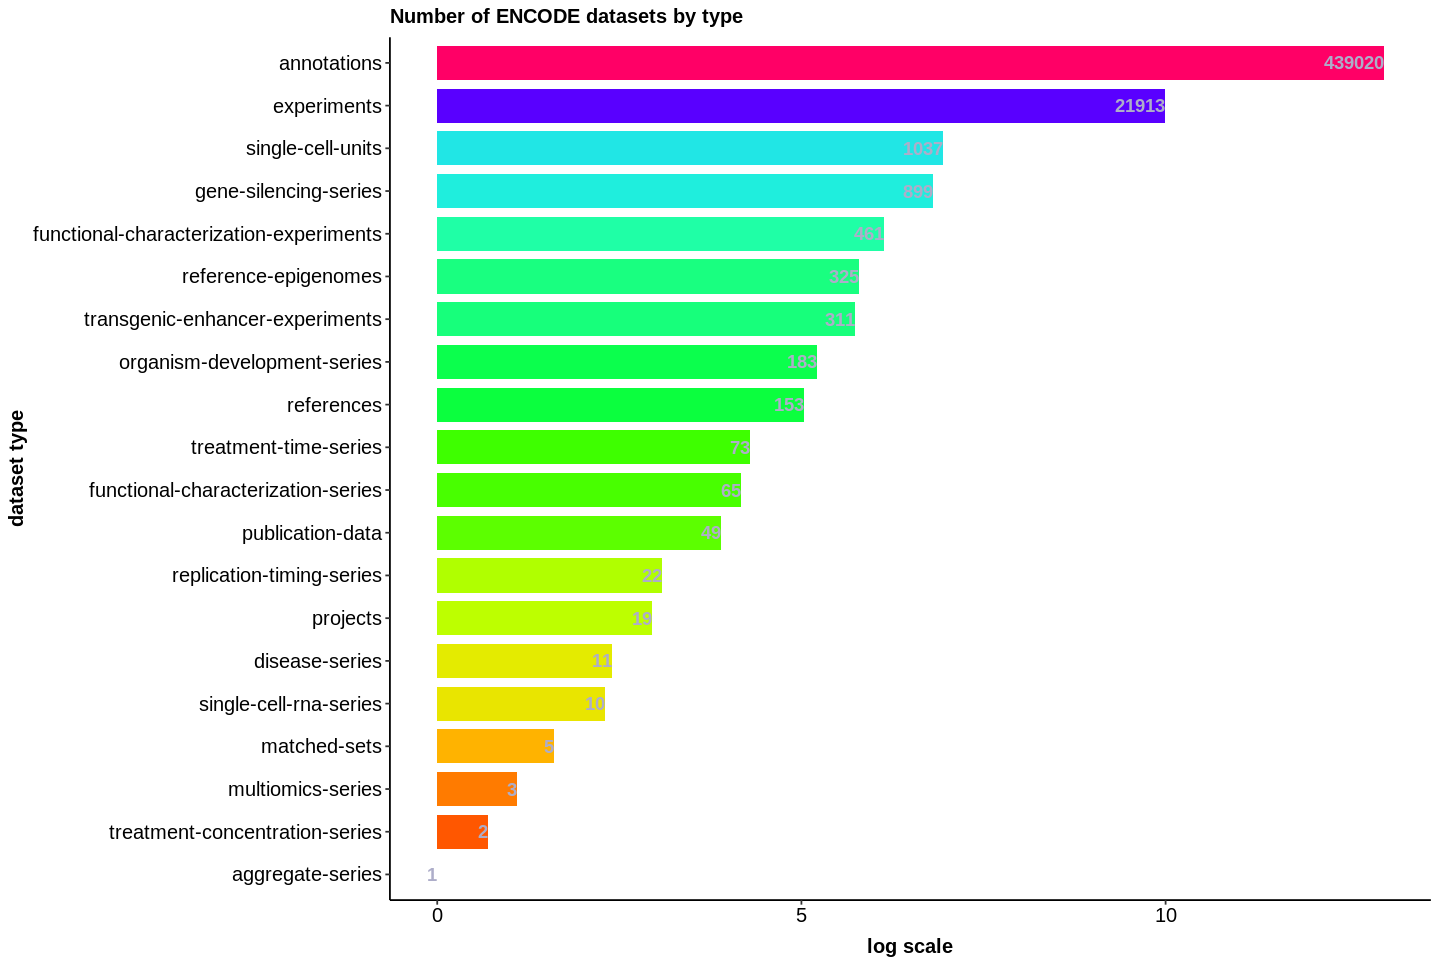

In [181]:
ggplot(my_df3) +
    geom_col(aes(x=reorder(dataset_type,Count), y=log(Count), fill=log(Count)),
    width=0.8, position = position_dodge(10)) +
    coord_flip() + theme_classic() +
    scale_fill_gradientn(colors=rainbow(15)) +
    geom_text(aes(x=reorder(dataset_type,Count), y=log(Count),label = Count), 
    vjust=0.5, hjust=1, angle=360, color="#adadc9", fontface='bold') +
    ggtitle("Number of ENCODE datasets by type") +
    theme(legend.position="none", 
            #plot.margin=unit(c(0.5,0.5,0.5,0.5),"cm"),
           axis.title.x=element_text(vjust = -0.5, size=12, color="black", face="bold"),
           axis.title.y=element_text(hjust = 0.5, size=12, color="black", face="bold"),
           axis.text.x =element_text(size=12, color="black"),
           axis.text.y =element_text(size=12, color="black")) + 
           theme(plot.title = element_text(size = 12, face = "bold"),
           panel.spacing = unit(1, 'cm')) +
           xlab("dataset type") +
           ylab("log scale") 

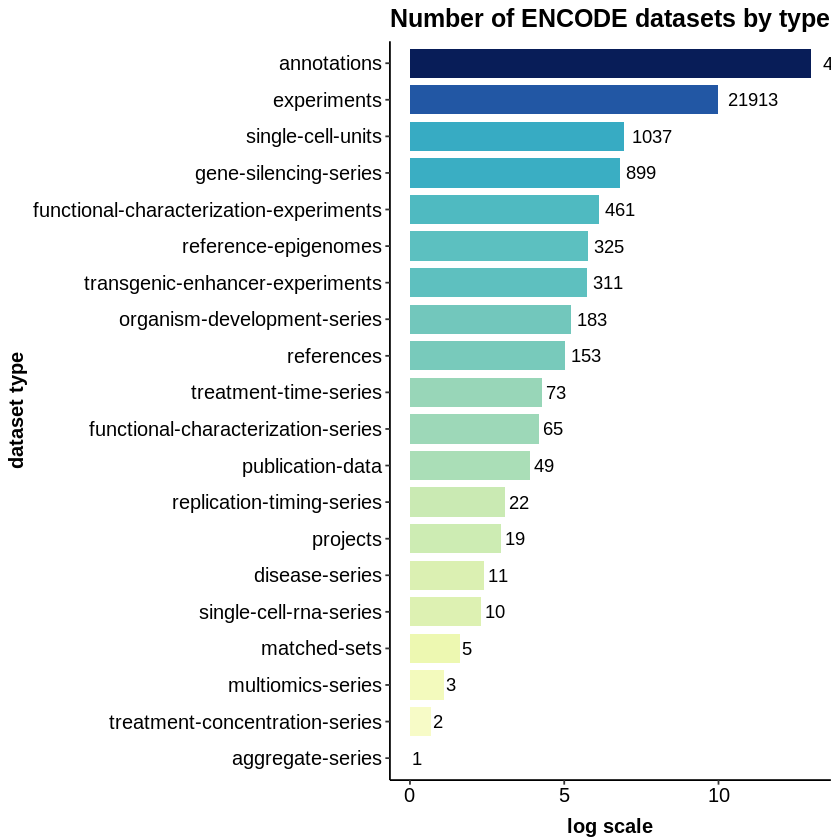

In [120]:
ggplot(my_df3) +
    geom_col(aes(x=reorder(dataset_type,Count), y=log(Count), fill=log(Count)), 
    width=0.8, position = position_dodge(50)) +
    coord_flip() + theme_classic() +
    scale_fill_gradientn(colors=morecols(50)) +
    geom_text(aes(x=reorder(dataset_type,Count), y=log(Count),label = Count), 
    vjust=0.5, hjust=-0.2, angle=360, color="black") +
    ggtitle("Number of ENCODE datasets by type") +
    theme(legend.position="none", 
            #plot.margin=unit(c(0.5,0.5,0.5,0.5),"cm"),
           axis.title.x=element_text(vjust = -0.5, size=12, color="black", face="bold"),
           axis.title.y=element_text(hjust = 0.5, size=12, color="black", face="bold"),
           axis.text.x =element_text(size=12, color="black"),
           axis.text.y =element_text(size=12, color="black")) + 
           theme(plot.title = element_text(size = 15, face = "bold"),
           panel.spacing = unit(1, 'cm')) +
           xlab("dataset type") +
           ylab("log scale") 

In [124]:
library(scales)

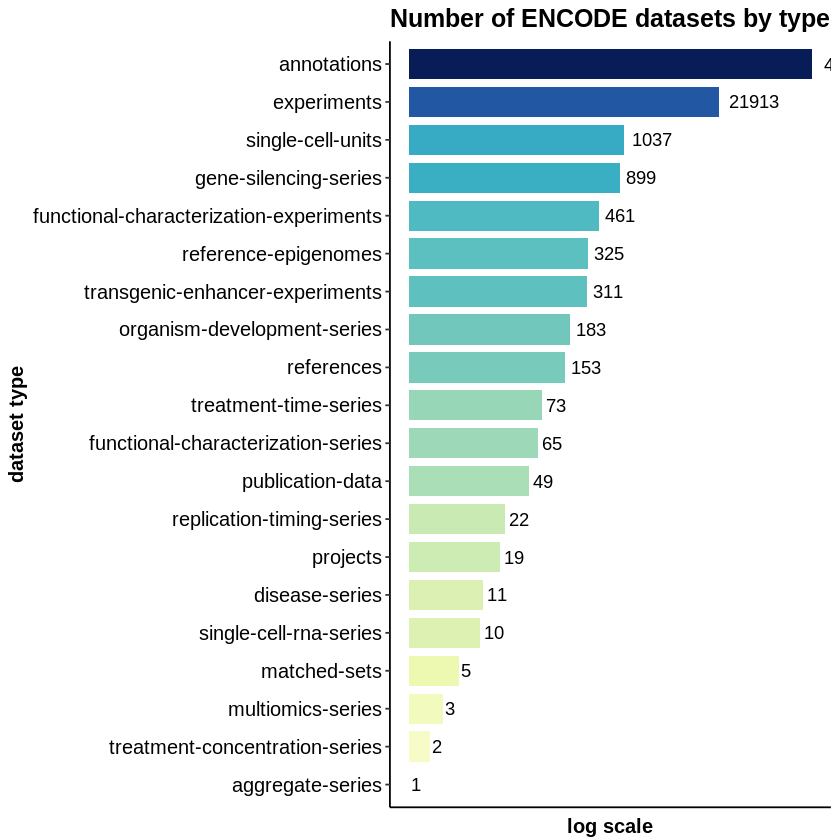

In [126]:
ggplot(my_df3) +
    geom_col(aes(x=reorder(dataset_type,Count), y=log(Count), fill=log(Count)), 
    width=0.8, position = position_dodge(50)) +
    coord_flip() + theme_classic() +
    scale_fill_gradientn(colors=morecols(50)) +
    geom_text(aes(x=reorder(dataset_type,Count), y=log(Count),label = Count), 
    vjust=0.5, hjust=-0.2, angle=360, color="black") +
    ggtitle("Number of ENCODE datasets by type") +
    theme(legend.position="none", 
            #plot.margin=unit(c(0.5,0.5,0.5,0.5),"cm"),
           axis.title.x=element_text(vjust = -0.5, size=12, color="black", face="bold"),
           axis.title.y=element_text(hjust = 0.5, size=12, color="black", face="bold"),
           axis.text.x =element_text(size=12, color="black"),
           axis.text.y =element_text(size=12, color="black")) + 
           theme(plot.title = element_text(size = 15, face = "bold"),
           panel.spacing = unit(1, 'cm')) +
           xlab("dataset type") +
           ylab("log scale") +
           scale_y_discrete(labels = wrap_format(10))

In [127]:
library(repr)

In [156]:
options(repr.plot.width=12, repr.plot.height=8)

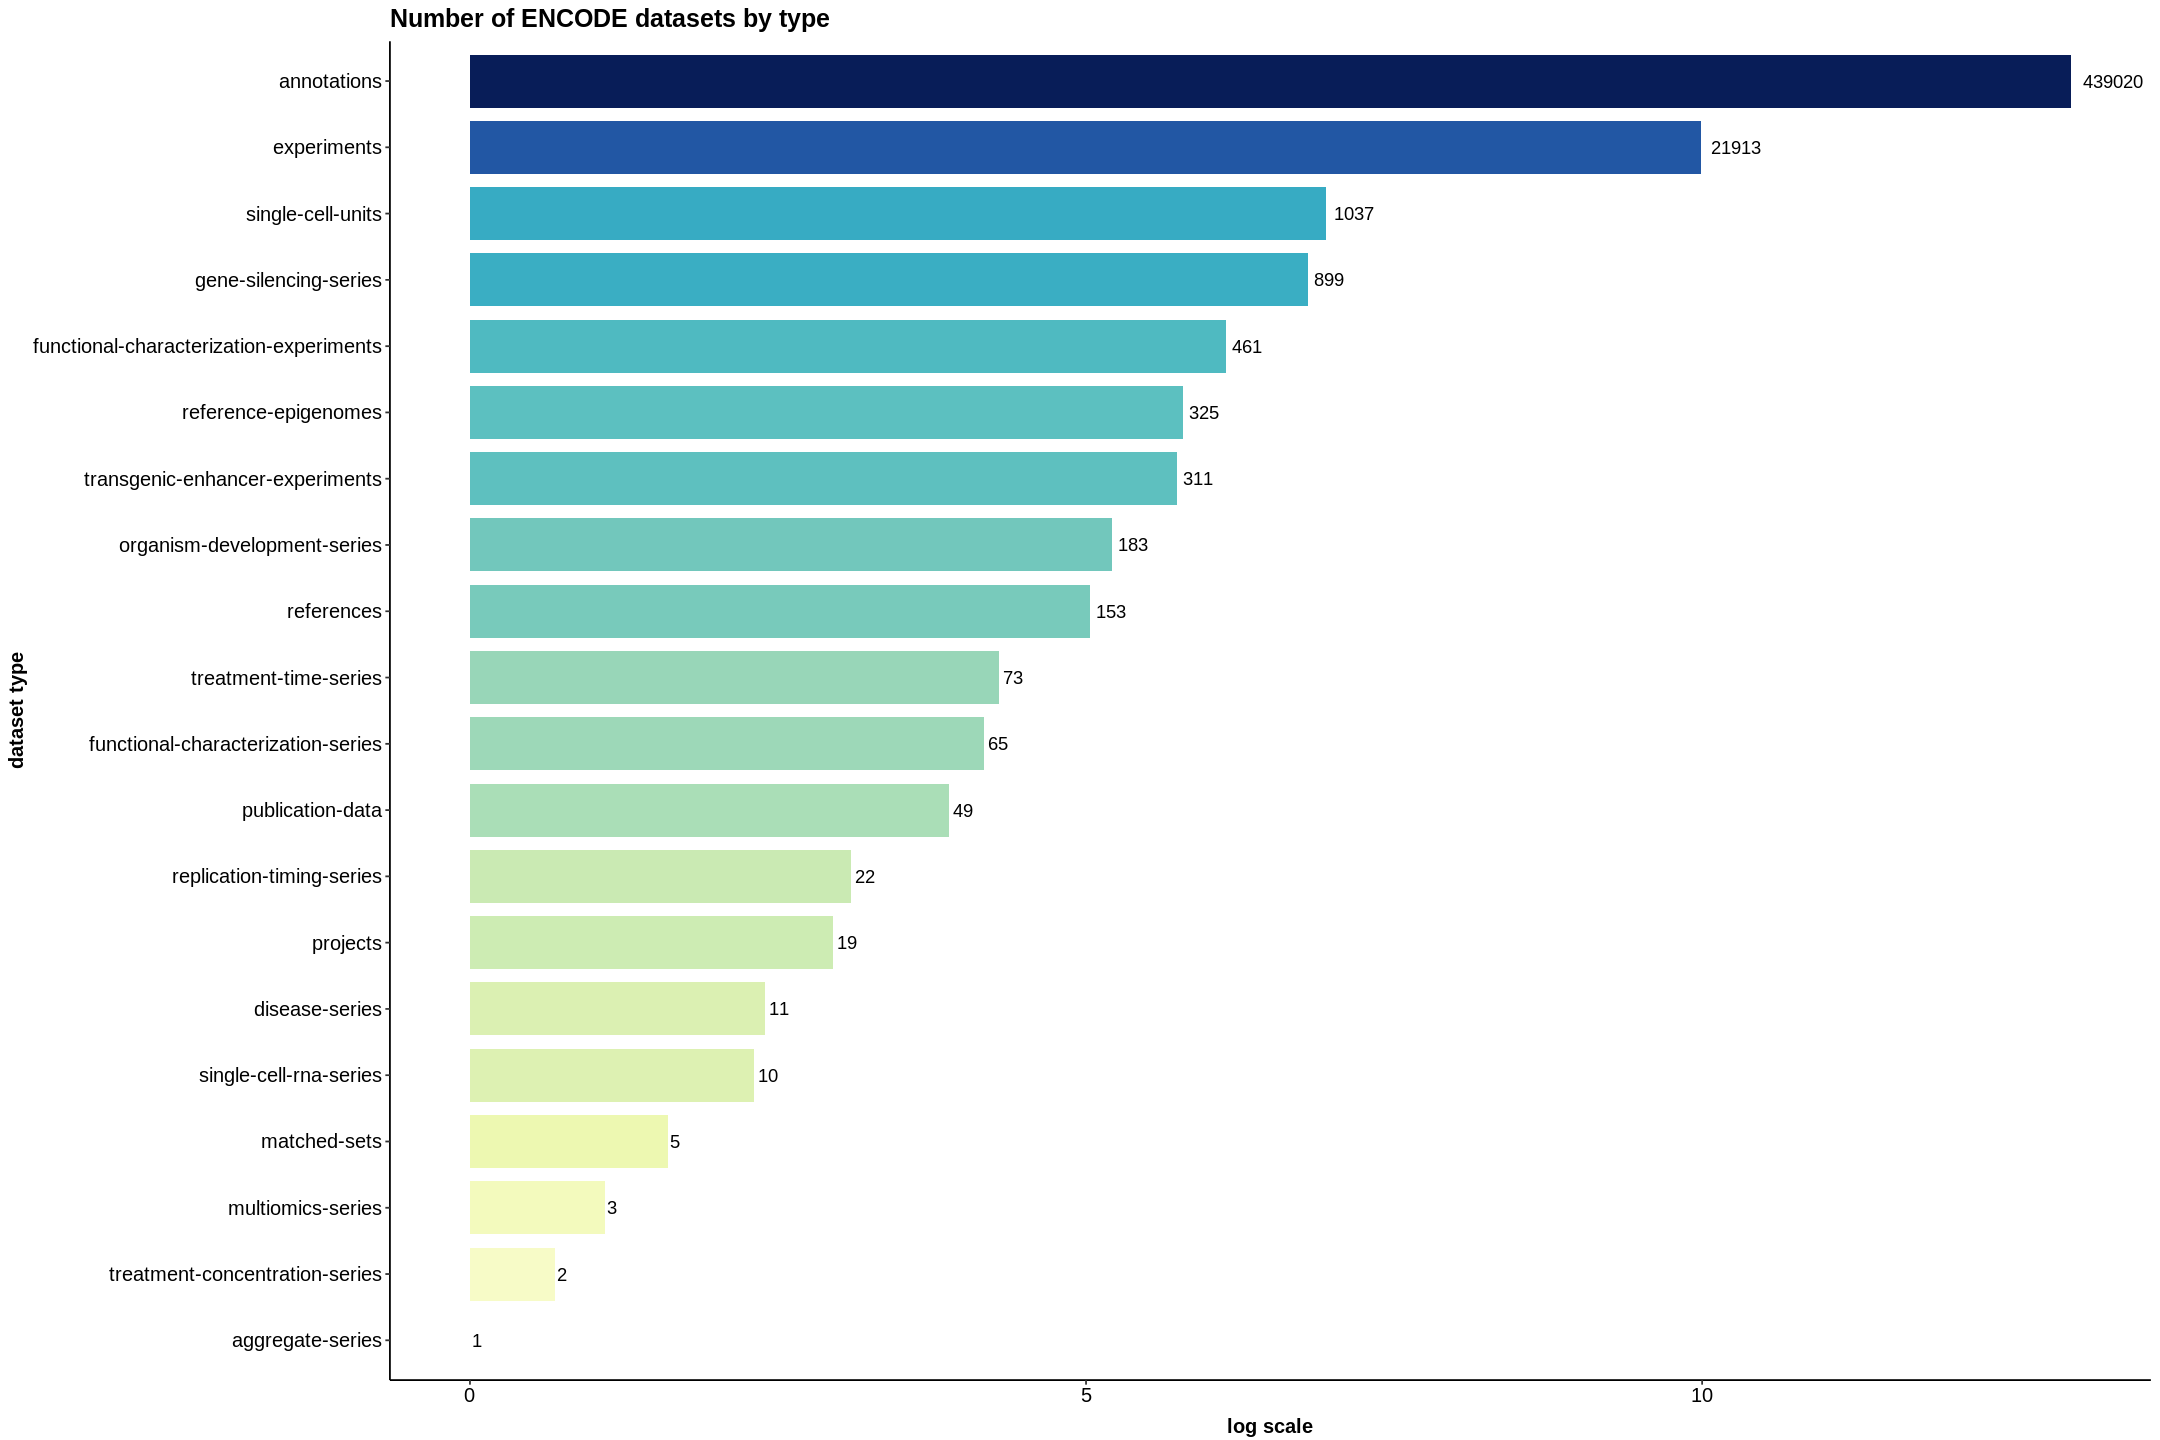

In [150]:
ggplot(my_df3) +
    geom_col(aes(x=reorder(dataset_type,Count), y=log(Count), fill=log(Count)), 
    width=0.8, position = position_dodge(50)) +
    coord_flip() + theme_classic() +
    scale_fill_gradientn(colors=morecols(50)) +
    geom_text(aes(x=reorder(dataset_type,Count), y=log(Count),label = Count), 
    vjust=0.5, hjust=-0.2, angle=360, color="black") +
    ggtitle("Number of ENCODE datasets by type") +
    theme(legend.position="none", 
            #plot.margin=unit(c(0.5,0.5,0.5,0.5),"cm"),
           axis.title.x=element_text(vjust = -0.5, size=12, color="black", face="bold"),
           axis.title.y=element_text(hjust = 0.5, size=12, color="black", face="bold"),
           axis.text.x =element_text(size=12, color="black"),
           axis.text.y =element_text(size=12, color="black")) + 
           theme(plot.title = element_text(size = 15, face = "bold")) +
           xlab("dataset type") +
           ylab("log scale")

In [170]:
install.packages("viridis")
library("viridis")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal




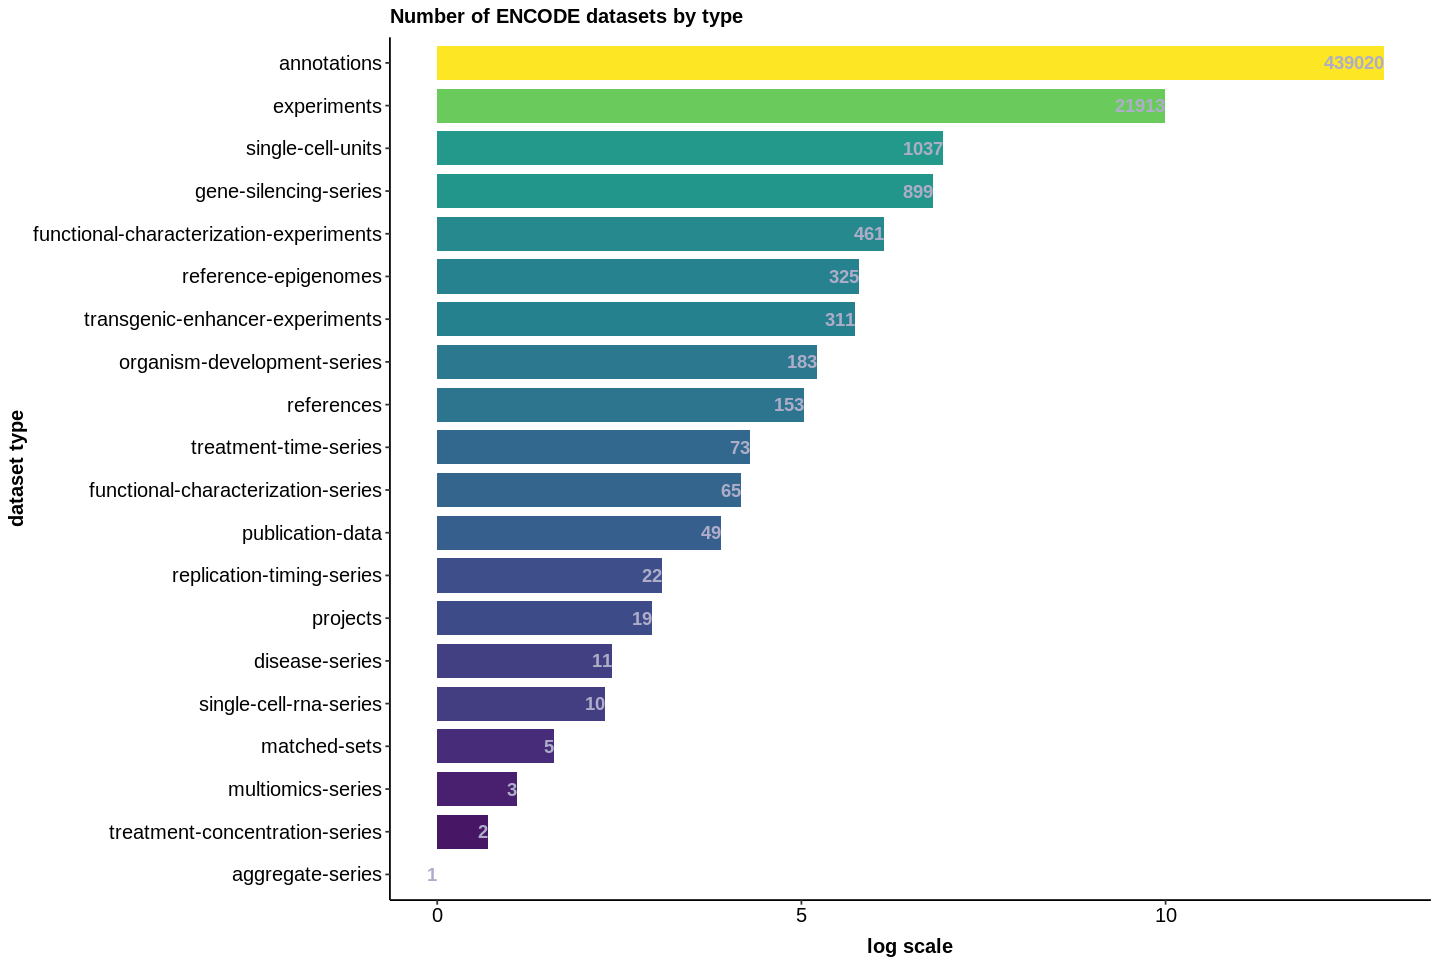

In [180]:
ggplot(my_df3) +
    geom_col(aes(x=reorder(dataset_type,Count), y=log(Count), fill=log(Count)), 
    width=0.8, position = position_dodge(50)) +
    coord_flip() + theme_classic() +
    scale_fill_gradientn(colors=viridis(10)) +
    geom_text(aes(x=reorder(dataset_type,Count), y=log(Count),label = Count), 
    vjust=0.5, hjust=1, angle=360, color="#adadc9", fontface='bold') +
    ggtitle("Number of ENCODE datasets by type") +
    theme(legend.position="none", 
            #plot.margin=unit(c(0.5,0.5,0.5,0.5),"cm"),
           axis.title.x=element_text(vjust = -0.5, size=12, color="black", face="bold"),
           axis.title.y=element_text(hjust = 0.5, size=12, color="black", face="bold"),
           axis.text.x =element_text(size=12, color="black"),
           axis.text.y =element_text(size=12, color="black")) + 
           theme(plot.title = element_text(size = 12, face = "bold"),
           panel.spacing = unit(1, 'cm')) +
           xlab("dataset type") +
           ylab("log scale") 

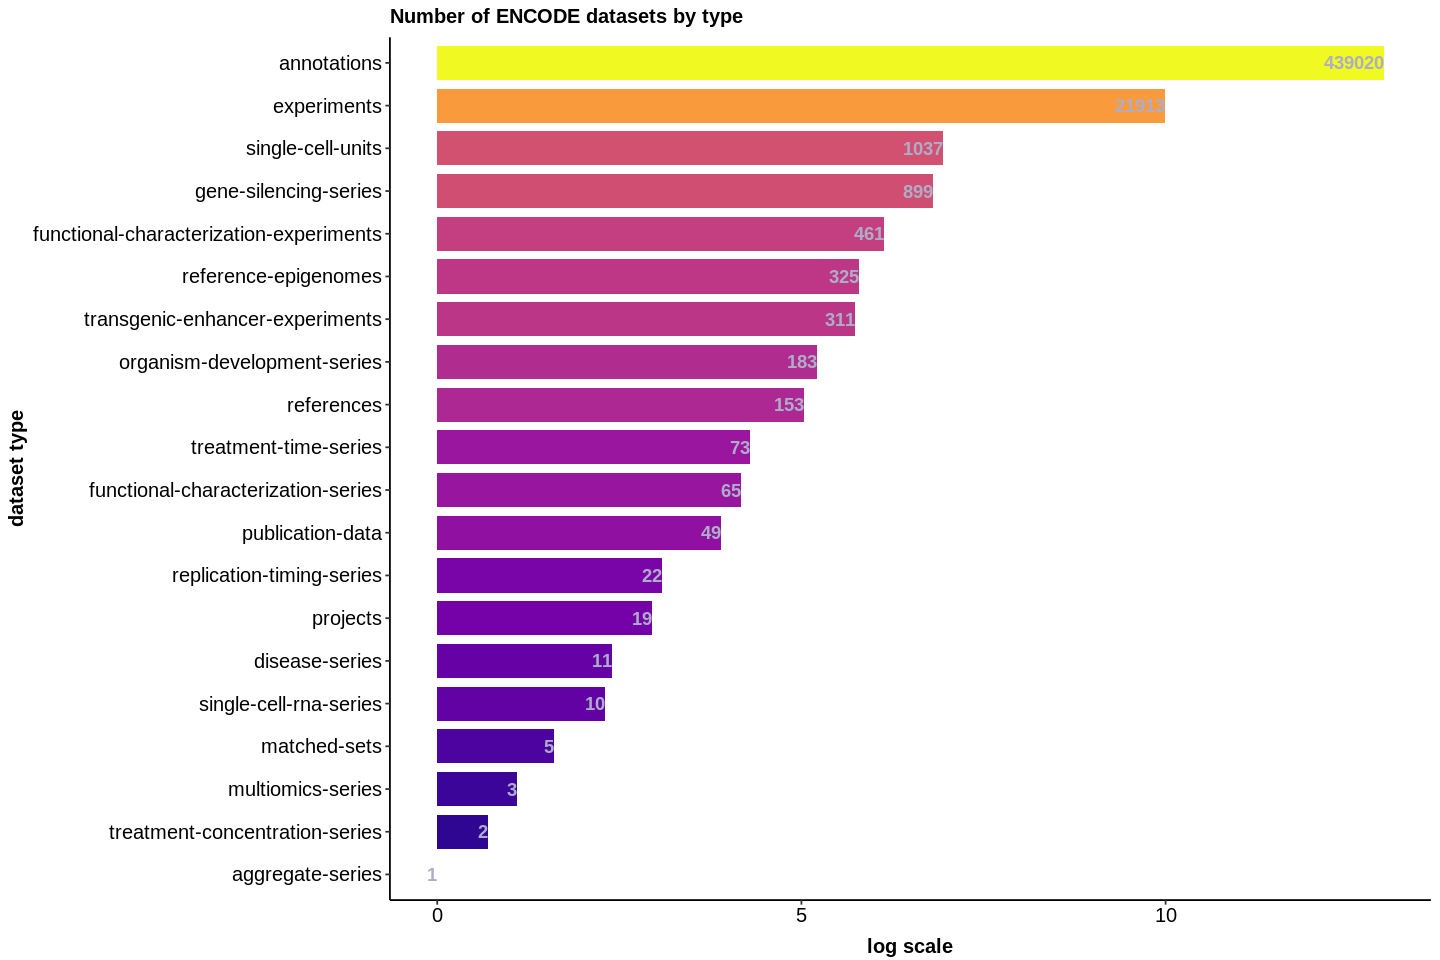

In [179]:
ggplot(my_df3) +
    geom_col(aes(x=reorder(dataset_type,Count), y=log(Count), fill=log(Count)), 
    width=0.8, position = position_dodge(50)) +
    coord_flip() + theme_classic() +
    scale_fill_gradientn(colors=plasma(10)) +
    geom_text(aes(x=reorder(dataset_type,Count), y=log(Count),label = Count), 
    vjust=0.5, hjust=1, angle=360, color="#adadc9", fontface='bold') +
    ggtitle("Number of ENCODE datasets by type") +
    theme(legend.position="none", 
            #plot.margin=unit(c(0.5,0.5,0.5,0.5),"cm"),
           axis.title.x=element_text(vjust = -0.5, size=12, color="black", face="bold"),
           axis.title.y=element_text(hjust = 0.5, size=12, color="black", face="bold"),
           axis.text.x =element_text(size=12, color="black"),
           axis.text.y =element_text(size=12, color="black")) + 
           theme(plot.title = element_text(size = 12, face = "bold"),
           panel.spacing = unit(1, 'cm')) +
           xlab("dataset type") +
           ylab("log scale") 

In [186]:
install.packages("dichromat")
library("dichromat")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [215]:
#https://drsimonj.svbtle.com/creating-corporate-colour-palettes-for-ggplot2
drsimonj_colors <- c(
  `red`        = "#d11141",
  `green`      = "#00b159",
  `blue`       = "#00aedb",
  `orange`     = "#f37735",
  `yellow`     = "#ffc425",
  `light grey` = "#cccccc",
  `dark grey`  = "#8c8c8c",
  `lightblue`  = "#079BCC",
  `lightpink`  = "#F89BCC",
  `neopink`    = "#F8138C",
  `neoyellow`  = "#F8F78C")

In [216]:
drsimonj_colors


red      green       blue     orange     yellow light grey  dark grey 
 "#d11141"  "#00b159"  "#00aedb"  "#f37735"  "#ffc425"  "#cccccc"  "#8c8c8c" 
 lightblue  lightpink    neopink  neoyellow 
 "#079BCC"  "#F89BCC"  "#F8138C"  "#F8F78C"

In [218]:
drsimonj_cols <- function(...) {
  cols <- c(...)

  if (is.null(cols))
    return (drsimonj_colors)

  drsimonj_colors[cols]
}

In [225]:
drsimonj_palettes <- list(
  `main`  = drsimonj_cols("blue", "green", "yellow"),

  `cool`  = drsimonj_cols("blue", "green"),

  `hot`   = drsimonj_cols("yellow", "orange", "red"),

  `mixed` = drsimonj_cols("blue", "green", "yellow", "orange", "red"),

  `grey`  = drsimonj_cols("light grey", "dark grey"),

  `mk_pallette` = drsimonj_cols("lightblue", "lightpink"),

  `mk_neo` = drsimonj_cols("lightpink", "yellow")
)

In [195]:
drsimonj_pal <- function(palette = "main", reverse = FALSE, ...) {
  pal <- drsimonj_palettes[[palette]]

  if (reverse) pal <- rev(pal)

  colorRampPalette(pal, ...)
}

In [196]:
drsimonj_pal("cool")(10)


[1] "#00AEDB" "#00AECC" "#00AEBE" "#00AFAF" "#00AFA1" "#00AF92" "#00B084"
 [8] "#00B075" "#00B067" "#00B159"

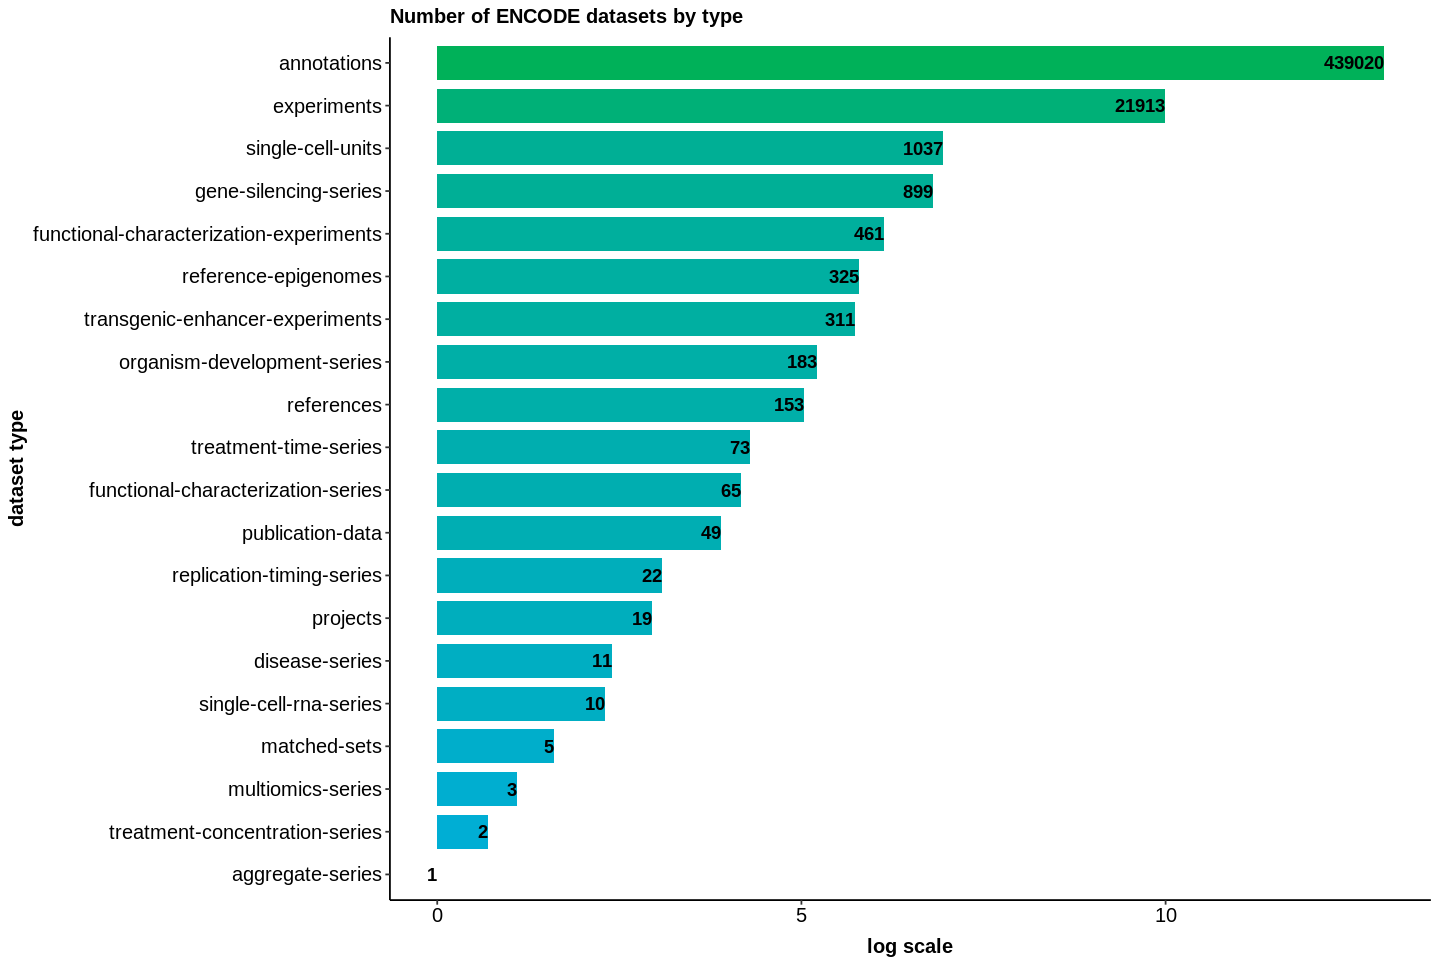

In [201]:
ggplot(my_df3) +
    geom_col(aes(x=reorder(dataset_type,Count), y=log(Count), fill=log(Count)), 
    width=0.8, position = position_dodge(50)) +
    coord_flip() + theme_classic() +
    scale_fill_gradientn(colors=drsimonj_pal("cool")(20)) +
    geom_text(aes(x=reorder(dataset_type,Count), y=log(Count),label = Count), 
    vjust=0.5, hjust=1, angle=360, color="black", fontface='bold') +
    ggtitle("Number of ENCODE datasets by type") +
    theme(legend.position="none", 
            #plot.margin=unit(c(0.5,0.5,0.5,0.5),"cm"),
           axis.title.x=element_text(vjust = -0.5, size=12, color="black", face="bold"),
           axis.title.y=element_text(hjust = 0.5, size=12, color="black", face="bold"),
           axis.text.x =element_text(size=12, color="black"),
           axis.text.y =element_text(size=12, color="black")) + 
           theme(plot.title = element_text(size = 12, face = "bold"),
           panel.spacing = unit(1, 'cm')) +
           xlab("dataset type") +
           ylab("log scale") 

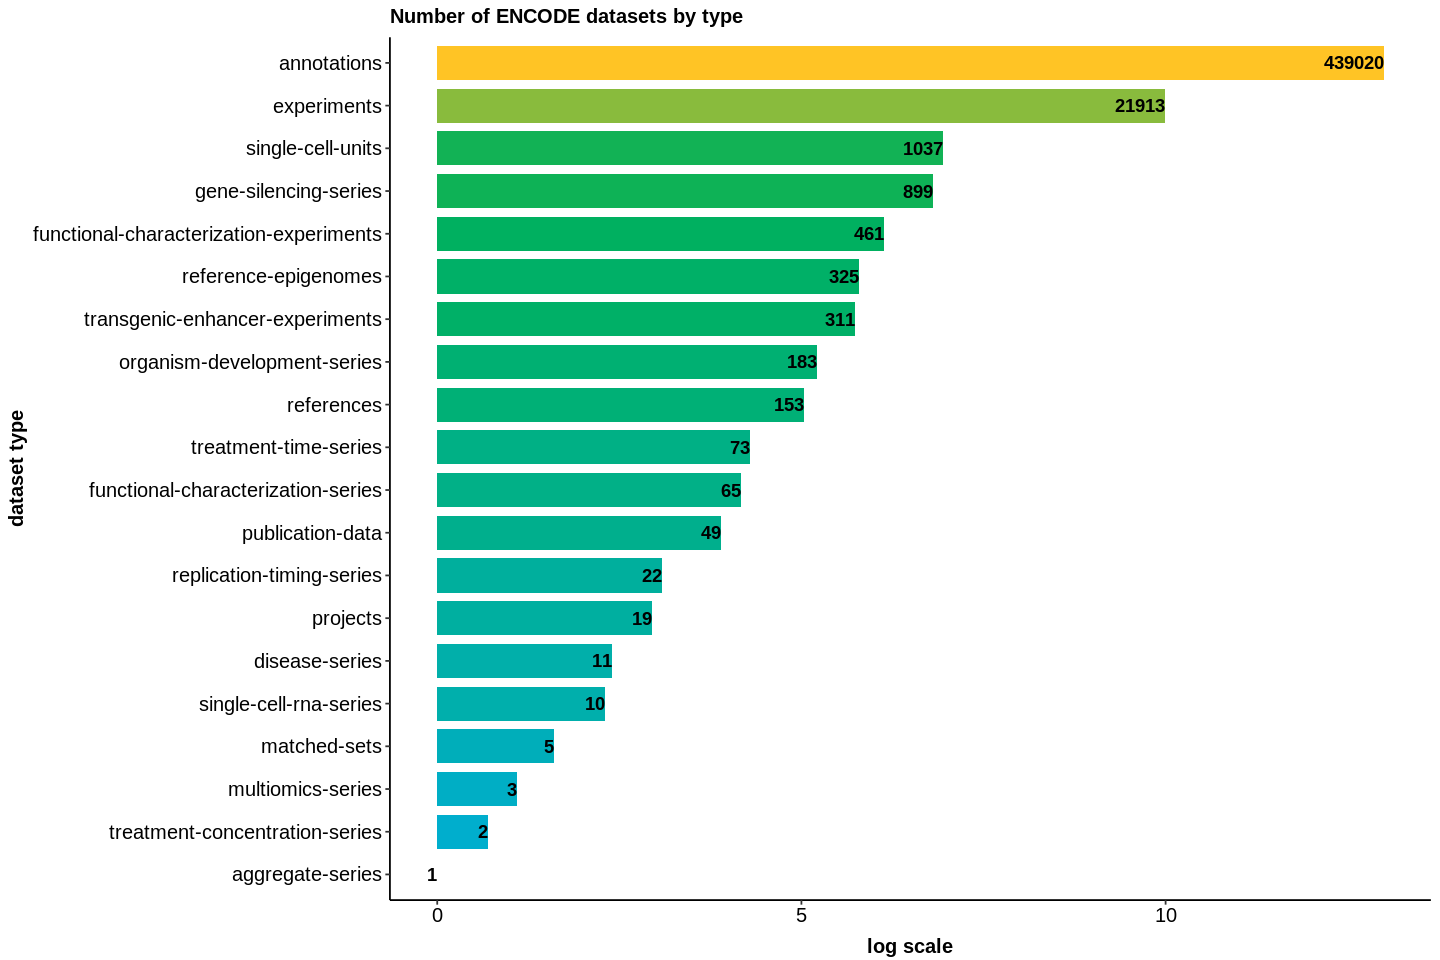

In [203]:
ggplot(my_df3) +
    geom_col(aes(x=reorder(dataset_type,Count), y=log(Count), fill=log(Count)), 
    width=0.8, position = position_dodge(50)) +
    coord_flip() + theme_classic() +
    scale_fill_gradientn(colors=drsimonj_pal("main")(25)) +
    geom_text(aes(x=reorder(dataset_type,Count), y=log(Count),label = Count), 
    vjust=0.5, hjust=1, angle=360, color="black", fontface='bold') +
    ggtitle("Number of ENCODE datasets by type") +
    theme(legend.position="none", 
            #plot.margin=unit(c(0.5,0.5,0.5,0.5),"cm"),
           axis.title.x=element_text(vjust = -0.5, size=12, color="black", face="bold"),
           axis.title.y=element_text(hjust = 0.5, size=12, color="black", face="bold"),
           axis.text.x =element_text(size=12, color="black"),
           axis.text.y =element_text(size=12, color="black")) + 
           theme(plot.title = element_text(size = 12, face = "bold"),
           panel.spacing = unit(1, 'cm')) +
           xlab("dataset type") +
           ylab("log scale")

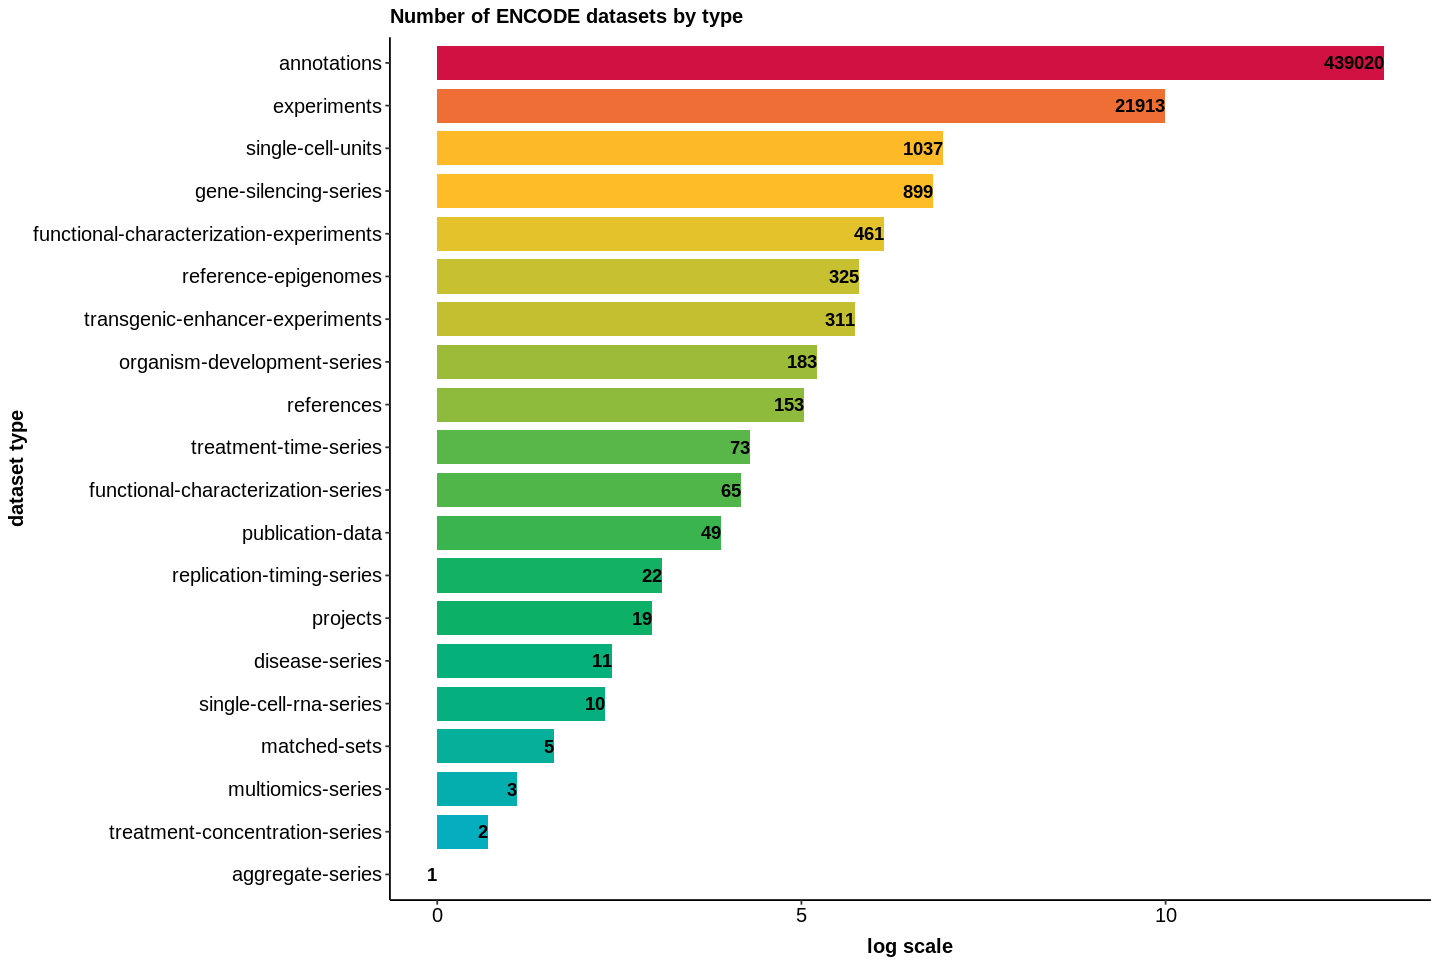

In [206]:
ggplot(my_df3) +
    geom_col(aes(x=reorder(dataset_type,Count), y=log(Count), fill=log(Count)), 
    width=0.8, position = position_dodge(50)) +
    coord_flip() + theme_classic() +
    scale_fill_gradientn(colors=drsimonj_pal("mixed")(15)) +
    geom_text(aes(x=reorder(dataset_type,Count), y=log(Count),label = Count), 
    vjust=0.5, hjust=1, angle=360, color="black", fontface='bold') +
    ggtitle("Number of ENCODE datasets by type") +
    theme(legend.position="none", 
            #plot.margin=unit(c(0.5,0.5,0.5,0.5),"cm"),
           axis.title.x=element_text(vjust = -0.5, size=12, color="black", face="bold"),
           axis.title.y=element_text(hjust = 0.5, size=12, color="black", face="bold"),
           axis.text.x =element_text(size=12, color="black"),
           axis.text.y =element_text(size=12, color="black")) + 
           theme(plot.title = element_text(size = 12, face = "bold"),
           panel.spacing = unit(1, 'cm')) +
           xlab("dataset type") +
           ylab("log scale")

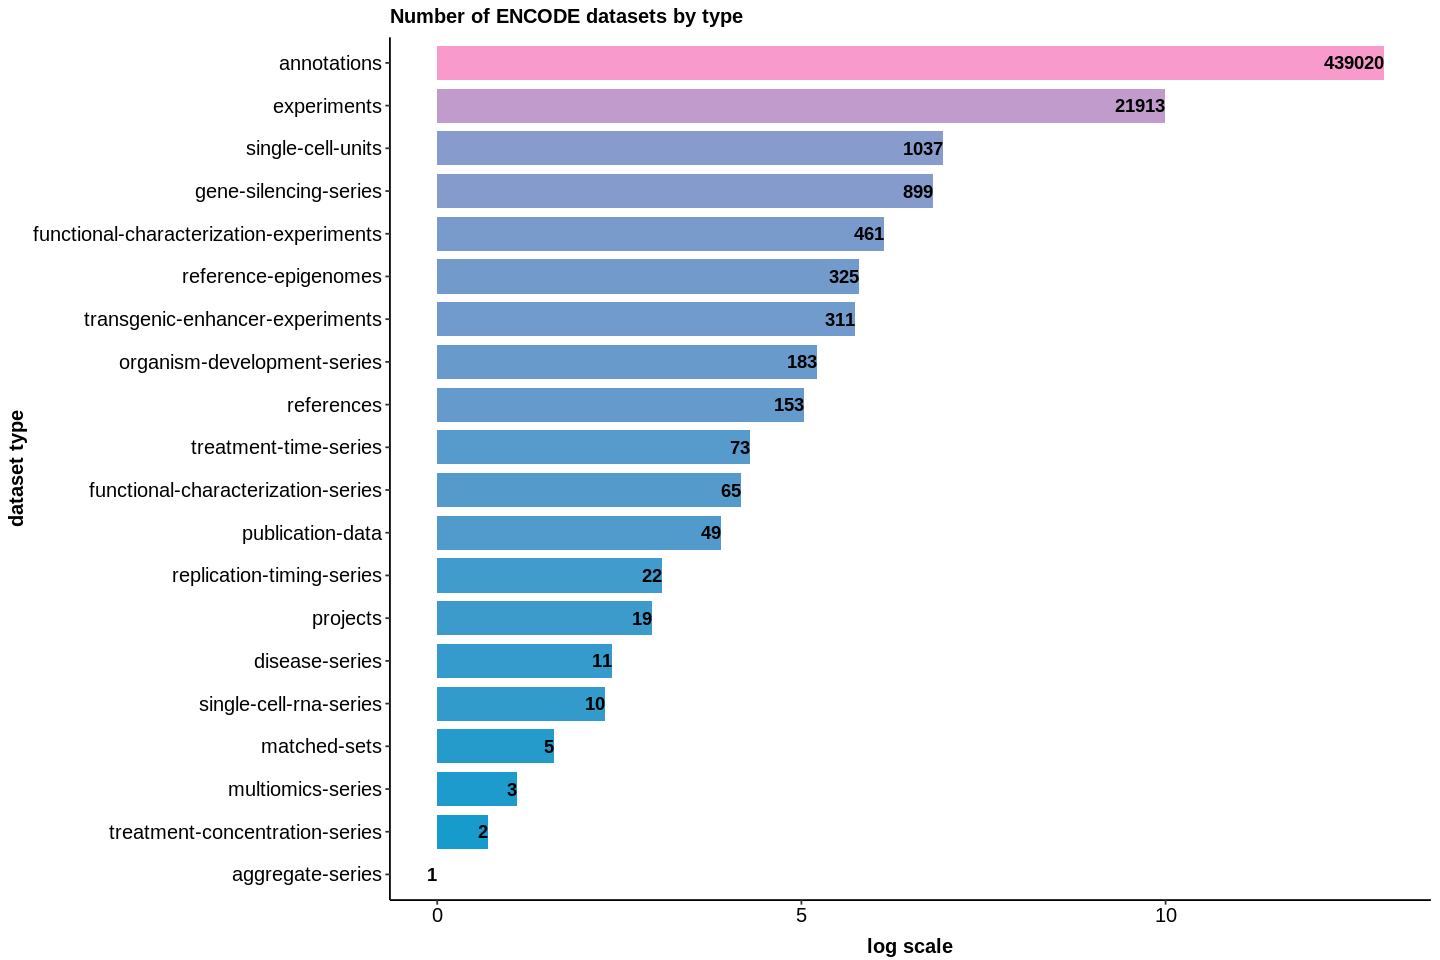

In [214]:
#mk_pallette
ggplot(my_df3) +
    geom_col(aes(x=reorder(dataset_type,Count), y=log(Count), fill=log(Count)), 
    width=0.8, position = position_dodge(50)) +
    coord_flip() + theme_classic() +
    scale_fill_gradientn(colors=drsimonj_pal("mk_pallette")(10)) +
    geom_text(aes(x=reorder(dataset_type,Count), y=log(Count),label = Count), 
    vjust=0.5, hjust=1, angle=360, color="black", fontface='bold') +
    ggtitle("Number of ENCODE datasets by type") +
    theme(legend.position="none", 
            #plot.margin=unit(c(0.5,0.5,0.5,0.5),"cm"),
           axis.title.x=element_text(vjust = -0.5, size=12, color="black", face="bold"),
           axis.title.y=element_text(hjust = 0.5, size=12, color="black", face="bold"),
           axis.text.x =element_text(size=12, color="black"),
           axis.text.y =element_text(size=12, color="black")) + 
           theme(plot.title = element_text(size = 12, face = "bold"),
           panel.spacing = unit(1, 'cm')) +
           xlab("dataset type") +
           ylab("log scale")

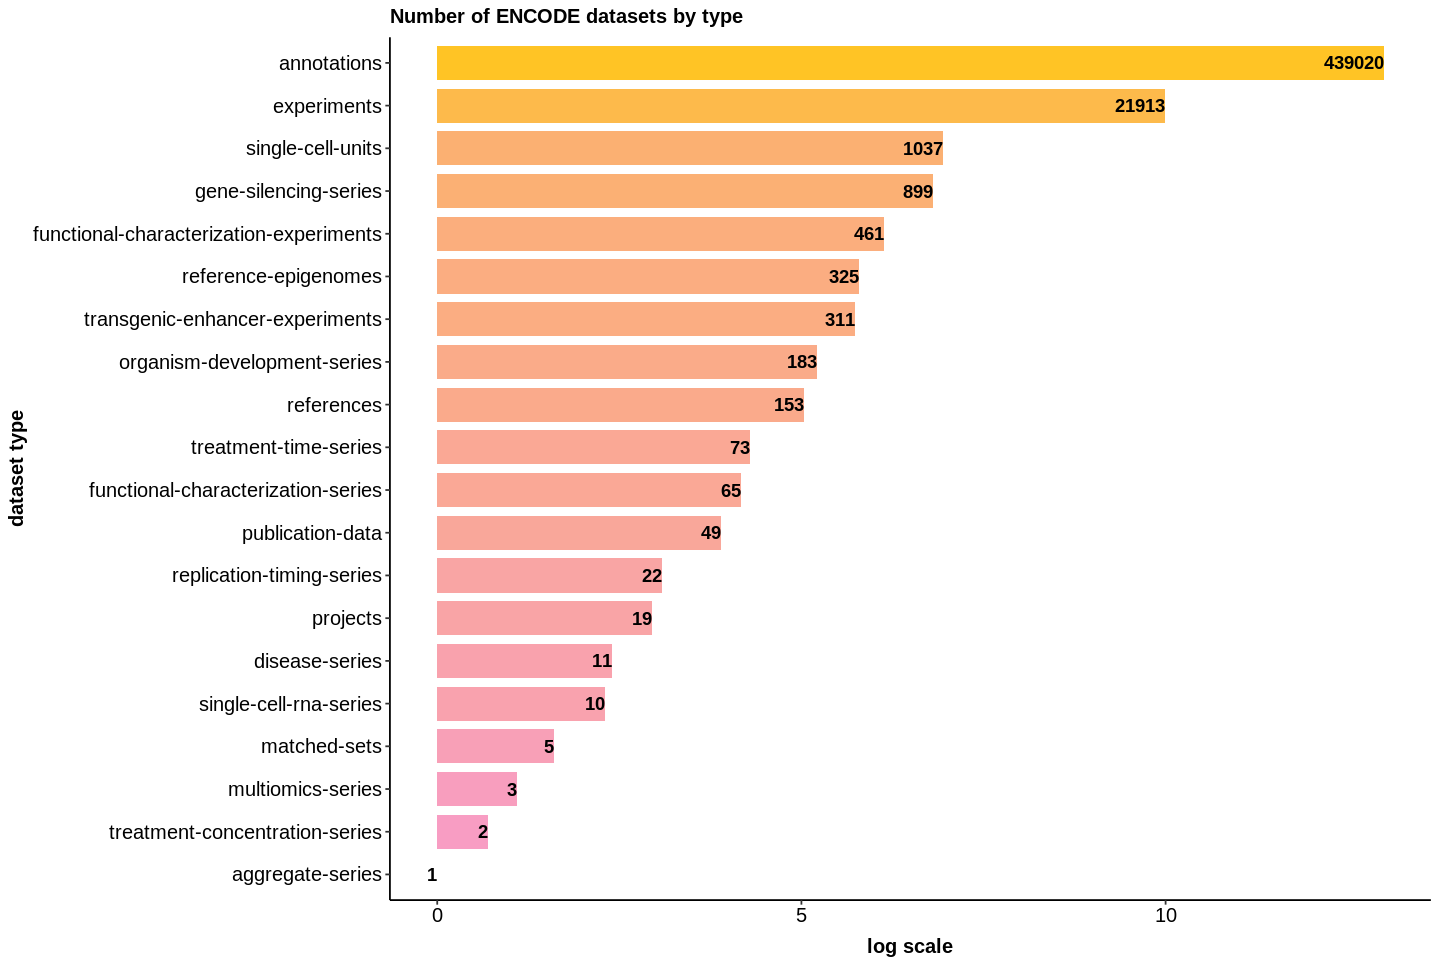

In [227]:
#mk_neo
ggplot(my_df3) +
    geom_col(aes(x=reorder(dataset_type,Count), y=log(Count), fill=log(Count)), 
    width=0.8, position = position_dodge(50)) +
    coord_flip() + theme_classic() +
    scale_fill_gradientn(colors=drsimonj_pal("mk_neo")(9)) +
    geom_text(aes(x=reorder(dataset_type,Count), y=log(Count),label = Count), 
    vjust=0.5, hjust=1, angle=360, color="black", fontface='bold') +
    ggtitle("Number of ENCODE datasets by type") +
    theme(legend.position="none", 
            #plot.margin=unit(c(0.5,0.5,0.5,0.5),"cm"),
           axis.title.x=element_text(vjust = -0.5, size=12, color="black", face="bold"),
           axis.title.y=element_text(hjust = 0.5, size=12, color="black", face="bold"),
           axis.text.x =element_text(size=12, color="black"),
           axis.text.y =element_text(size=12, color="black")) + 
           theme(plot.title = element_text(size = 12, face = "bold"),
           panel.spacing = unit(1, 'cm')) +
           xlab("dataset type") +
           ylab("log scale")